In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
from tqdm import tqdm_notebook as tqdm

In [4]:
train = pd.read_csv("../dataset/original/train.csv")
test = pd.read_csv("../dataset/original/x_test.csv")

In [5]:
train.shape

(5719, 11)

In [6]:
test.shape

(300, 10)

In [7]:
test

,Unnamed: 0,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope
0,WE 29 June 2019,1027,SINGLE,114.23,BRAND2,0.56,10.0,24.386541,66337.0,1
1,WE 06 July 2019,1027,SINGLE,114.23,BRAND2,0.55,4.0,37.437842,49992.0,1
2,WE 13 July 2019,1027,SINGLE,114.23,BRAND2,0.45,0.0,28.039623,58062.0,1
3,WE 20 July 2019,1027,SINGLE,114.23,BRAND2,0.50,19.0,100.000000,90908.0,1
4,WE 27 July 2019,1027,SINGLE,114.23,BRAND2,0.42,26.0,99.191839,108957.0,1
...,...,...,...,...,...,...,...,...,...,...
295,WE 16 November 2019,1206,SINGLE,125.65,BRAND4,0.41,19.0,98.800841,111353.0,1
296,WE 23 November 2019,1206,SINGLE,125.65,BRAND4,0.57,2.0,99.129248,63359.0,1
297,WE 30 November 2019,1206,SINGLE,125.65,BRAND4,0.57,0.0,28.696578,35238.0,1
298,WE 07 December 2019,1206,SINGLE,125.65,BRAND4,0.56,2.0,18.972899,34242.0,1


In [8]:
def convert_date(df):
    df['Unnamed: 0'] = df['Unnamed: 0'].str.split(" ")
    df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: "-".join(x[1:]))
    df = df.rename(columns={'Unnamed: 0':'Date'})
    df.Date = pd.to_datetime(df.Date)
    return df

In [9]:
df = pd.concat([train, test])

In [10]:
df = convert_date(df)

In [11]:
df = df.sort_values(['sku','Date'])
df = df.reset_index(drop=True)

# Encoding Categorical Features

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.pack = le.fit_transform(df.pack)
le.classes_

array(['MULTI', 'SINGLE'], dtype=object)

In [13]:
df.brand = le.fit_transform(df.brand)
le.classes_

array(['BRAND1', 'BRAND2', 'BRAND3', 'BRAND4', 'BRAND5'], dtype=object)

In [14]:
df

,Date,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target
0,2016-12-10,144,0,114.23,1,2.18,NaN,NaN,NaN,1,51320.0
1,2016-12-17,144,0,114.23,1,2.00,45.0,100.000000,51320.0,1,66431.0
2,2016-12-24,144,0,114.23,1,2.05,17.0,100.000000,66431.0,1,57001.0
3,2016-12-31,144,0,114.23,1,3.00,2.0,100.000000,57001.0,1,15052.0
4,2017-01-07,144,0,114.23,1,2.99,2.0,28.534193,15052.0,1,22016.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,2019-05-25,2718,1,395.41,0,1.11,0.0,26.050480,33875.0,0,33328.0
6015,2019-06-01,2718,1,395.41,0,1.30,1.0,43.099496,33328.0,0,22512.0
6016,2019-06-08,2718,1,395.41,0,1.55,0.0,0.000000,22512.0,0,17461.0
6017,2019-06-15,2718,1,395.41,0,1.55,0.0,0.000000,17461.0,0,17105.0


In [15]:
train = df[~df.target.isna()]
train.shape

(5719, 11)

In [16]:
test = df[df.target.isna()]
test.shape

(300, 11)

# Plot

In [17]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)

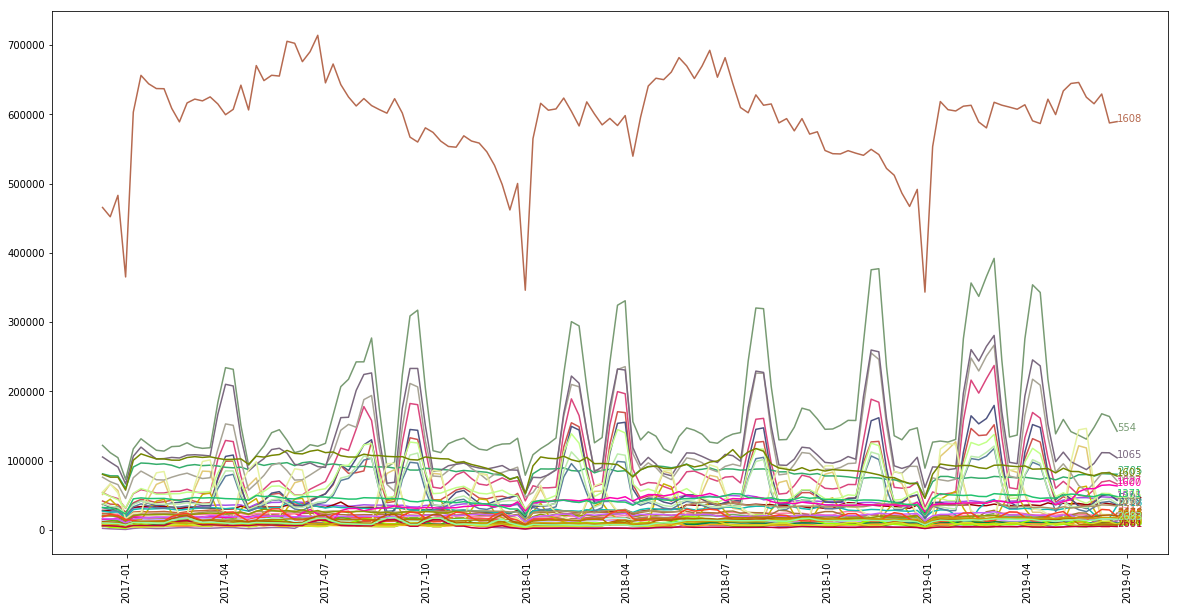

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

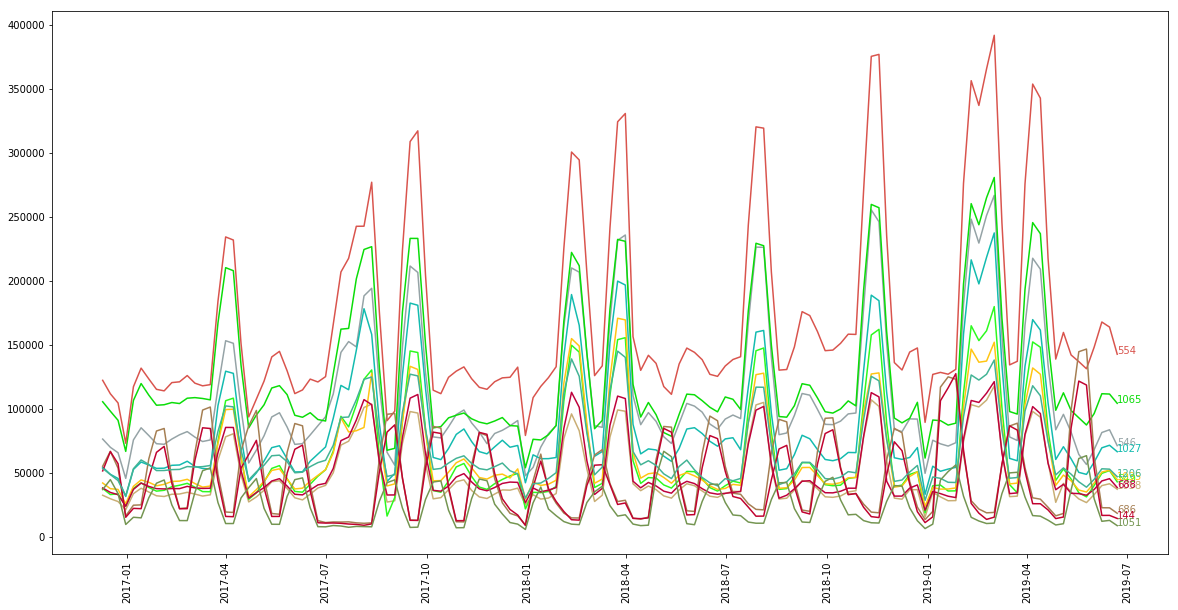

In [19]:
# Time series of sku to be predicted 
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(train[train.scope == 1].sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train[train.scope == 1].sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

In [20]:
train = train.sort_values(['sku', 'Date'])
train = train.reset_index(drop=True)

## Average Sales per sku

In [21]:
avg = train[['sku', 'target']].groupby('sku').mean()

In [22]:
avg.target.values

array([ 42686.89473684, 111831.5112782 ,  64297.36842105, 171707.21804511,
        47912.30827068,  51916.96240602,  88266.10526316,  63473.54887218,
        24904.90977444,  48221.2481203 , 127803.98496241,  66936.55639098,
        14337.63157895,   7014.98496241,  43975.11278195,  29796.04511278,
        14415.03007519,  39041.18796992,  35620.06766917,  94164.0075188 ,
       594245.22556391,  21092.2556391 ,  20482.22556391,   9304.33834586,
         7886.93984962,   5756.11278195,   8717.78947368,  10530.90977444,
        18436.39849624,   7471.59398496,  14164.18045113,   5498.63157895,
        11888.2406015 ,  11930.87218045,  16391.34586466,  17292.13533835,
        12833.03759398,  21857.44360902,  84047.68421053,  32601.88721805,
        13382.2406015 ,  21891.2481203 ,  29862.96240602])

<Figure size 864x648 with 0 Axes>

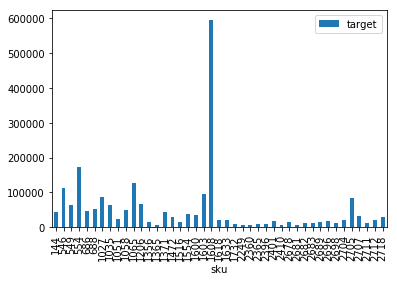

In [23]:
plt.figure(figsize=(12, 9));
avg = train[['sku', 'target']].groupby('sku').mean()
avg.plot(kind='bar');
#plt.grid(color='black', linestyle='--', linewidth=.5);
#plt.yticks(np.arange(0, 7, step=1.0));
#plt.xlabel("");
#plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1.1));

# Peaks Analysis

## Extract peak indeces

In [24]:
def get_peaks(df, highest=True): 
    """
    La funzione get_min_significant_diff cerca di prendere quelle peak che sono realmente significative:
    guardo la differenza nel target tra monte e valle e si considerano tutti quei peaks che hanno una ampiezza maggiore
    di un certo delta, stabilito a seconda della time series
    
    return: (peak_value, peak_index, peak-valley)
    """
    peaks = []
    peak_idxs = []
    start_idx = df.index[0]
    end_idx = df.index[-1]
    i = start_idx 
    peak = df.loc[i, 'target']
    valley = df.loc[i, 'target']
    diff = []
    while(i < end_idx ):
        while(i < end_idx and df.loc[i, 'target'] >= df.loc[i+1, 'target']):
            i += 1
        valley = df.loc[i, 'target']
        while(i < end_idx and df.loc[i, 'target'] <= df.loc[i+1, 'target']):
            i += 1
        peak = df.loc[i, 'target']
        
        diff.append(peak-valley)
        peaks.append((peak, i, peak-valley))
    
    if highest==False:
        return [x[0] for x in peaks], [x[1] for x in peaks], [x[2] for x in peaks]
    
    
    diff = diff[:-1]    # alla fine peak - valley = 0, rimuoviamo l'ultimo valore
    def get_min_significant_diff(diff):
        diff = [(x, i) for i, x in enumerate(diff)]
        diff.sort(key=lambda x: x[0], reverse=True)
        residual = [diff[x][0] - diff[x+1][0] for x in range(len(diff)-1)]
        max_res_idx = np.argmax(residual)
        min_significant_diff = diff[max_res_idx][0]
        return min_significant_diff
    
    delta = get_min_significant_diff(diff)
    highest_peaks = [x for x in peaks if x[2] >= delta]
    
    # Create a list for each tuple element position
    pks = [x[0] for x in highest_peaks]
    idxs = [x[1] for x in highest_peaks]
    jumps = [x[2] for x in highest_peaks]

    return pks, idxs, jumps

## Check Frequencies of significant peaks

In [25]:
from collections import Counter

In [26]:
def get_common_peaks_day(highest=True):
    common_peak_days = []
    for s in tqdm(set(train.sku)):
        _, peak_idx, _ = get_peaks(train[train.sku==s], highest=highest)
        dt = list(train.loc[peak_idx].Date.values)
        common_peak_days.append(dt)
    common_peak_days = [x.astype(str).split('T')[0] for y in common_peak_days for x in y]
    return common_peak_days

In [27]:
common_peak_days = get_common_peaks_day()

<BarContainer object of 63 artists>

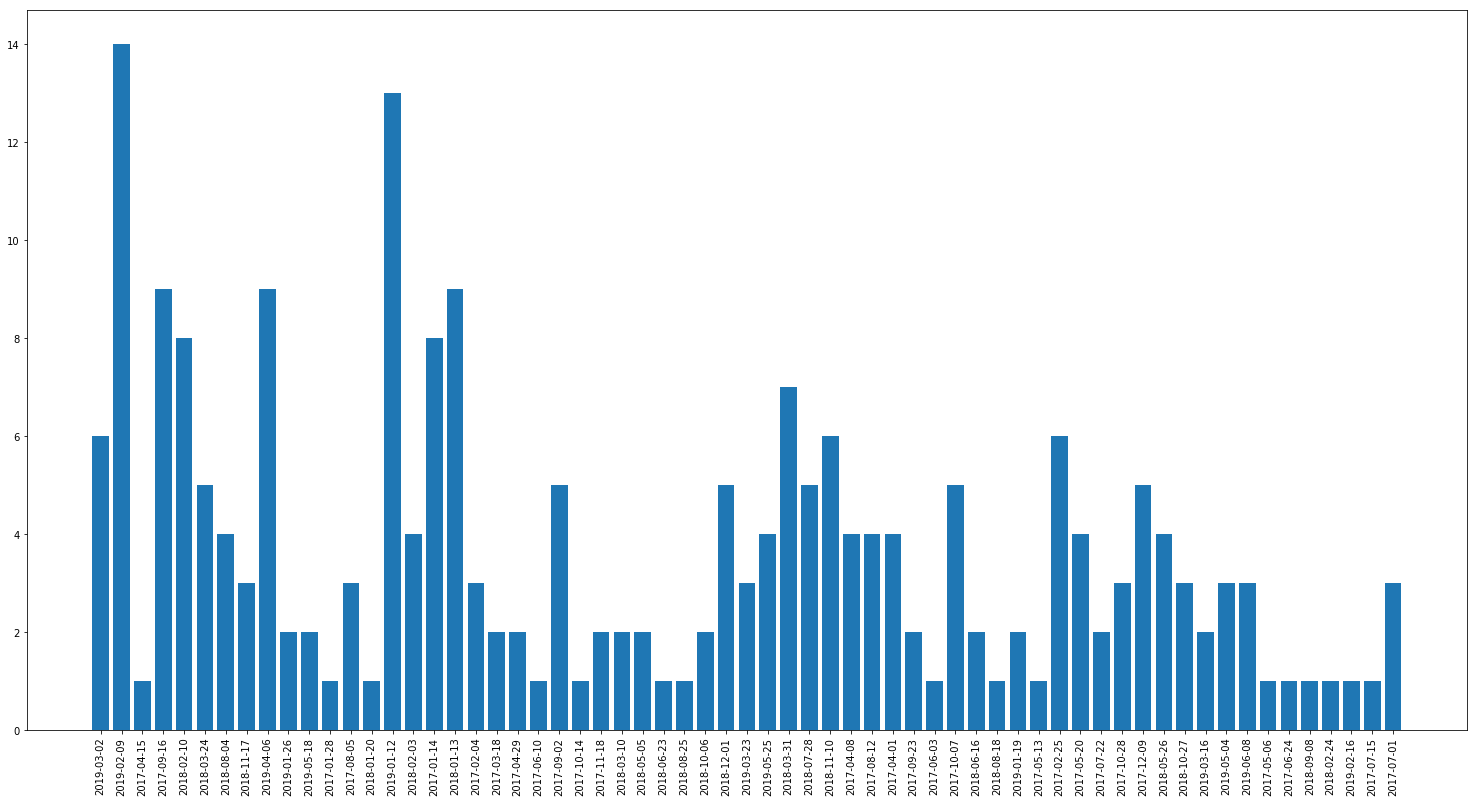

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(list(Counter(common_peak_days).keys()), list(Counter(common_peak_days).values()))

## Check Frequencies of all peaks

In [29]:
common_peak_days = get_common_peaks_day(highest=False)

<BarContainer object of 115 artists>

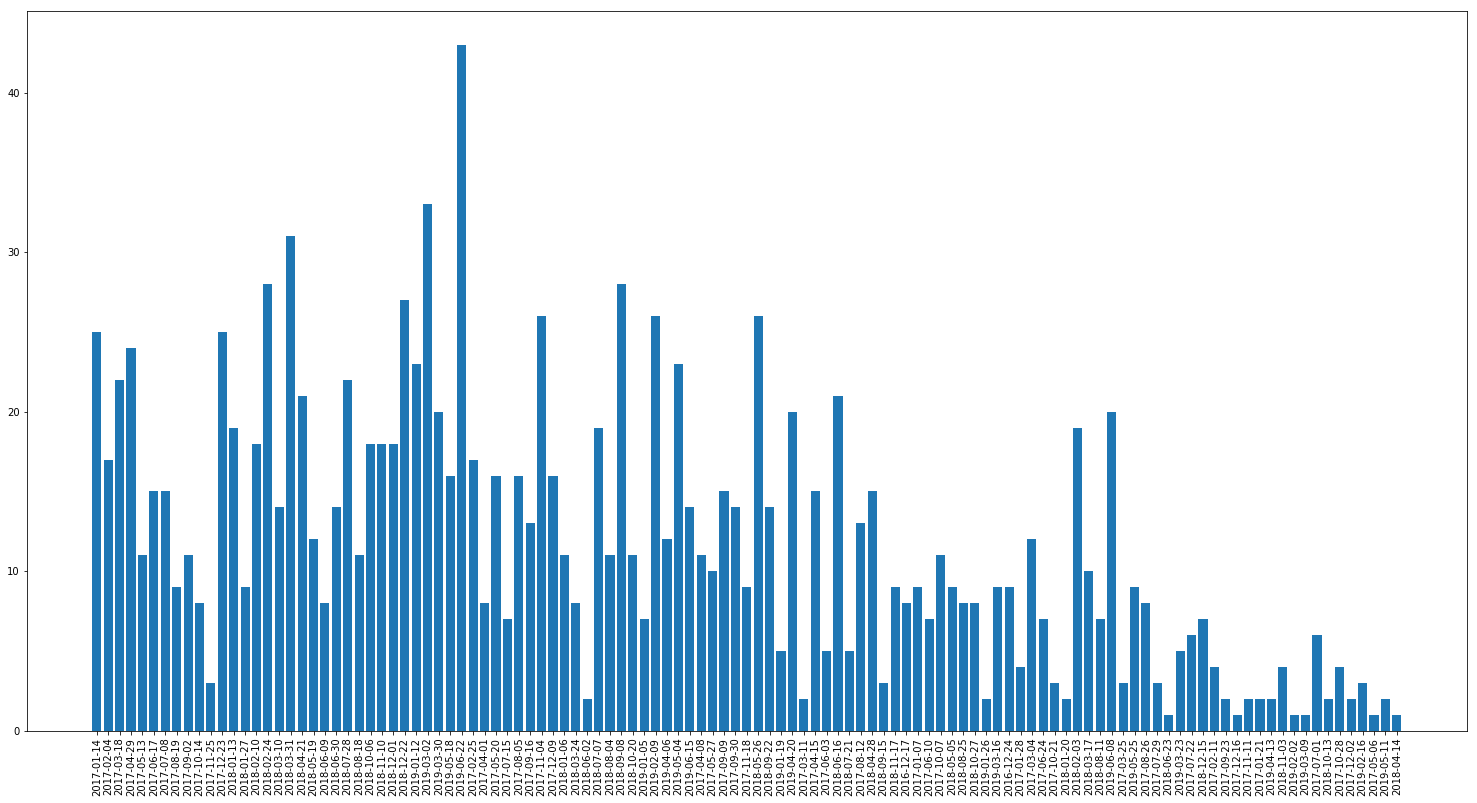

In [30]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(list(Counter(common_peak_days).keys()), list(Counter(common_peak_days).values()))

In [31]:
Counter(common_peak_days).most_common()

[('2019-06-22', 43),
 ('2019-03-02', 33),
 ('2018-03-31', 31),
 ('2018-02-24', 28),
 ('2018-09-08', 28),
 ('2018-12-22', 27),
 ('2017-11-04', 26),
 ('2019-02-09', 26),
 ('2018-05-26', 26),
 ('2017-01-14', 25),
 ('2017-12-23', 25),
 ('2017-04-29', 24),
 ('2019-01-12', 23),
 ('2019-05-04', 23),
 ('2017-03-18', 22),
 ('2018-07-28', 22),
 ('2018-04-21', 21),
 ('2018-06-16', 21),
 ('2019-03-30', 20),
 ('2019-04-20', 20),
 ('2019-06-08', 20),
 ('2018-01-13', 19),
 ('2018-07-07', 19),
 ('2018-02-03', 19),
 ('2018-02-10', 18),
 ('2018-10-06', 18),
 ('2018-11-10', 18),
 ('2018-12-01', 18),
 ('2017-02-04', 17),
 ('2017-02-25', 17),
 ('2019-05-18', 16),
 ('2017-05-20', 16),
 ('2017-08-05', 16),
 ('2017-12-09', 16),
 ('2017-06-17', 15),
 ('2017-07-08', 15),
 ('2017-09-09', 15),
 ('2017-04-15', 15),
 ('2018-04-28', 15),
 ('2018-03-10', 14),
 ('2018-06-30', 14),
 ('2019-06-15', 14),
 ('2017-09-30', 14),
 ('2018-09-22', 14),
 ('2017-09-16', 13),
 ('2017-08-12', 13),
 ('2018-05-19', 12),
 ('2019-04-06

# Price variation

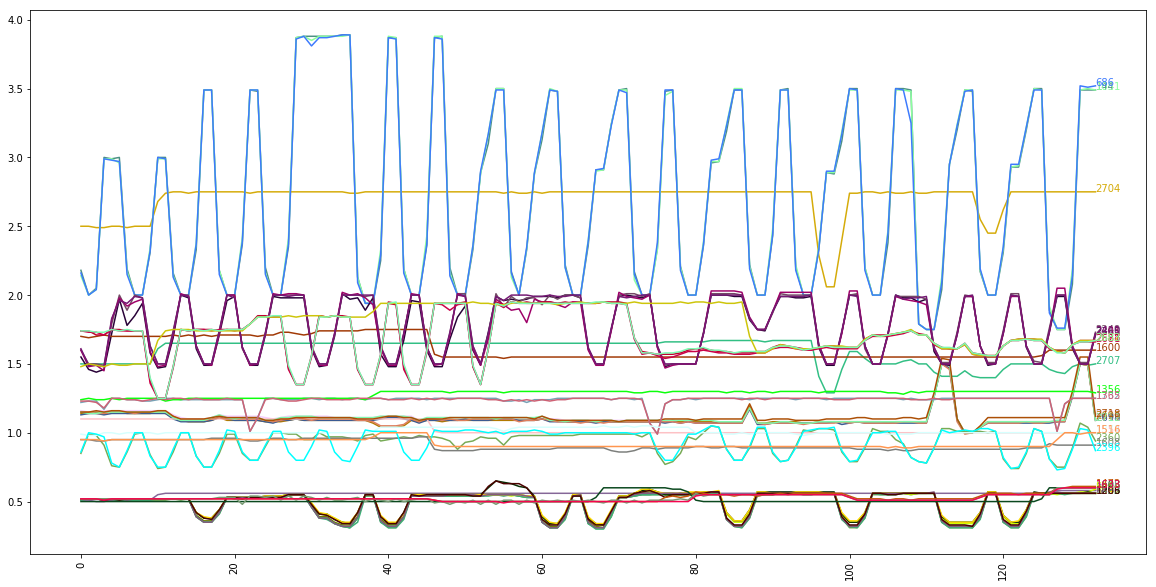

In [189]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(train.sku)), replace=False)

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].price,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].price.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


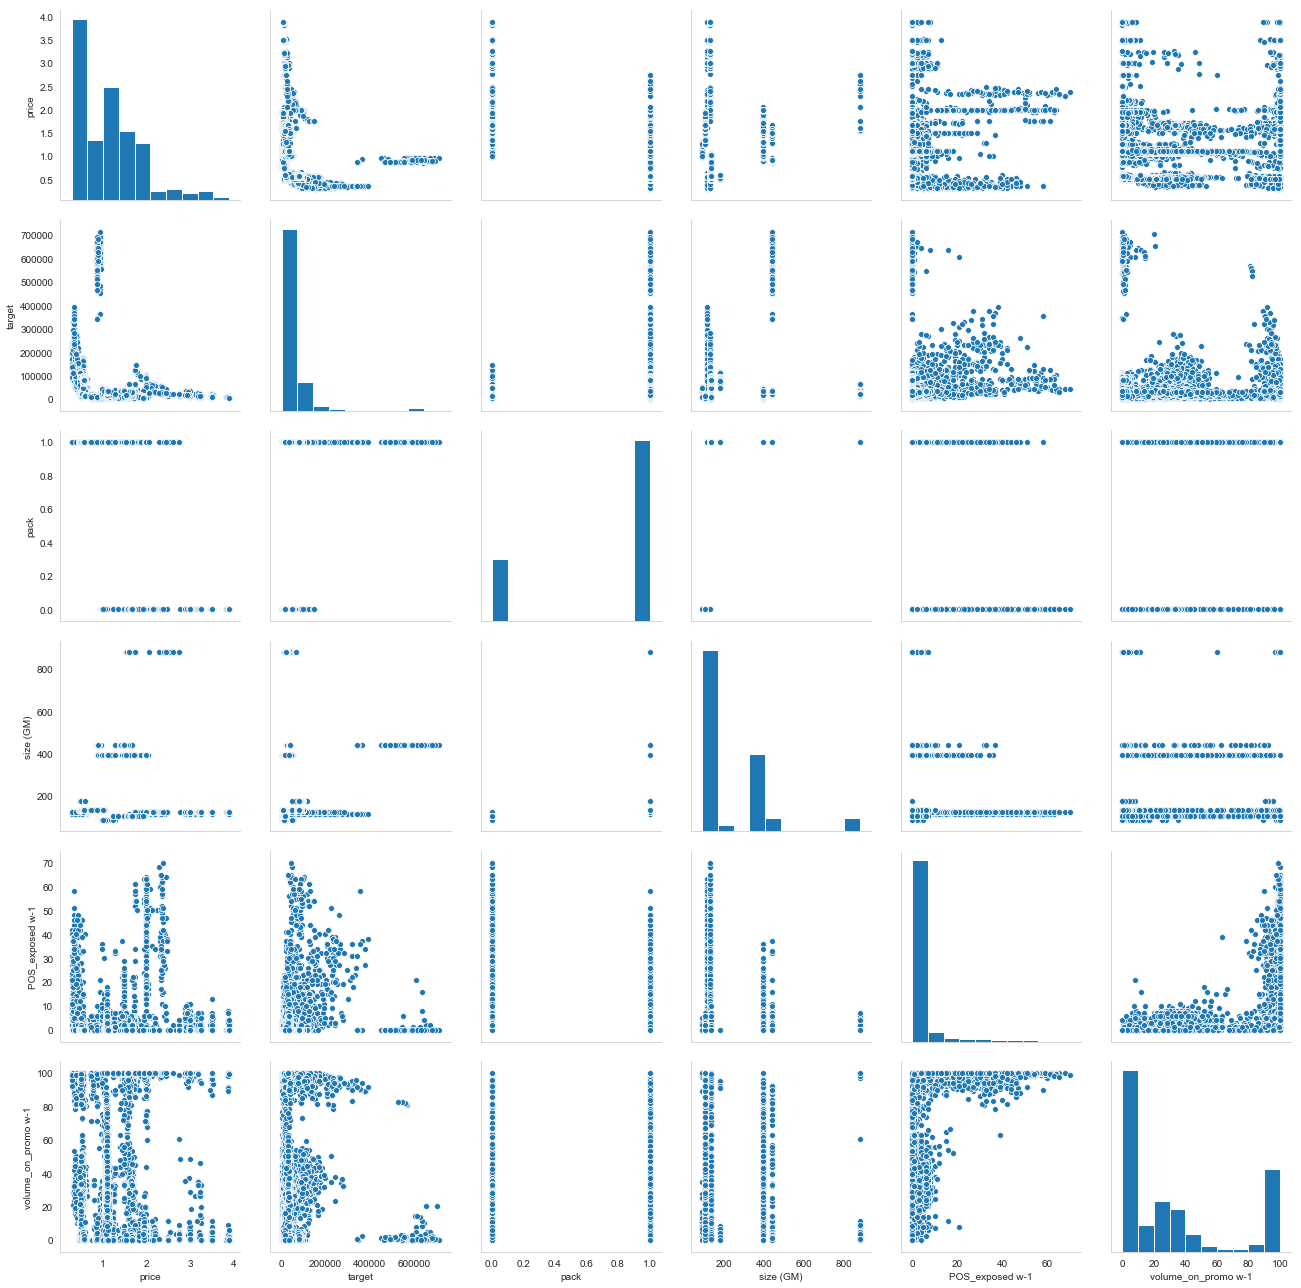

In [194]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(df[['price', 'target', 'pack', 'size (GM)', 'POS_exposed w-1', 'volume_on_promo w-1']], size=3)

price-target --> Le vendite si alzano più i prezzi sono bassi, con qualche variazione intorno a 2

pack-target --> Ci sono più vendite quando pack=1

size-target --> Più vendite quando la size è piccola

In [193]:
train

,Date,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target,moving_average,increment
0,0,144,0,114.23,1,2.18,0.0,0.000000,0.0,1,51320.0,0.000000,0.0
1,1,144,0,114.23,1,2.00,45.0,100.000000,51320.0,1,66431.0,51320.000000,51320.0
2,2,144,0,114.23,1,2.05,17.0,100.000000,66431.0,1,57001.0,58875.500000,15111.0
3,3,144,0,114.23,1,3.00,2.0,100.000000,57001.0,1,15052.0,58250.666667,-9430.0
4,4,144,0,114.23,1,2.99,2.0,28.534193,15052.0,1,22016.0,47451.000000,-41949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,128,2718,1,395.41,0,1.11,0.0,26.050480,33875.0,0,33328.0,31208.727273,1312.0
5715,129,2718,1,395.41,0,1.30,1.0,43.099496,33328.0,0,22512.0,31031.818182,-547.0
5716,130,2718,1,395.41,0,1.55,0.0,0.000000,22512.0,0,17461.0,30325.909091,-10816.0
5717,131,2718,1,395.41,0,1.55,0.0,0.000000,17461.0,0,17105.0,29164.090909,-5051.0


# Feature Engineering

In [ ]:
# Forse dopo aver fatto le features ci merita togliere le righe del primo giorno in assoluto [che hanno svariati campi = Nan]

In [60]:
train = train.sort_values(['Date'])

In [85]:
train

,Date,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target
0,0,144,0,114.23,1,2.18,0.0,0.000000,0.0,1,51320.0
1463,0,1206,1,125.65,3,0.52,0.0,0.000000,0.0,1,53301.0
3990,0,2678,0,105.44,0,1.74,0.0,0.000000,0.0,0,12038.0
3857,0,2410,1,395.41,4,1.61,0.0,0.000000,0.0,0,7312.0
1862,0,1371,0,87.87,2,0.99,0.0,0.000000,0.0,0,32569.0
...,...,...,...,...,...,...,...,...,...,...,...
3989,132,2410,1,395.41,4,1.72,3.0,100.000000,12379.0,0,8356.0
2393,132,1554,1,395.41,2,1.00,0.0,0.000000,47434.0,0,45462.0
3324,132,2249,1,395.41,4,1.73,3.0,93.796134,11380.0,0,7607.0
1462,132,1065,1,125.65,3,0.56,3.0,36.370096,111463.0,1,104197.0


In [132]:
# Moving Average
def moving_average(df, k):
    # RETURN DF
    # Da cambiare in modo da aggiungere velocemente la feature quando si incrementa il dataset
    df = df.sort_values(['sku','Date']).reset_index(drop=True)
    curr_idx = 0
    previous_k_idx = curr_idx
    current_sku = None
    """
    k: indicates how much of the past consider [at most]
    """
    res = []
    for i, s, t in tqdm(zip(df.index, df.sku, df.target)):
        if not s == current_sku or current_sku is None:
            if not i % 133 == 0:
                print(i)
            res.append(np.nan)
            current_sku = s
            curr_idx += 1
            previous_k_idx = i
        else:
            avg = np.mean(df.loc[previous_k_idx:curr_idx-1, 'target'].values)
            if i == 1:
                print(df.loc[previous_k_idx:curr_idx-1, 'target'].values)
            res.append(avg)
            
            if curr_idx - previous_k_idx > k:
                previous_k_idx += 1
            curr_idx += 1
    
    df['moving_average'] = res
    return df

In [155]:
# Pendenza
def slope(df):
    """
    slope values = [0,+1, -1]
    """
    df = df.sort_values(['sku','Date']).reset_index(drop=True)
    curr_idx = 0
    current_sku = None
    res_slope = []
    res_changes = []
    for i, s, s_1 in tqdm(zip(df.index, df.sku, df['sales w-1'])):
        if not current_sku == s or current_sku is None:
            current_sku = s
            curr_idx += 1
            res_slope.append(0)
            res_changes.append(0)
            
        else:
            res_slope.append(np.sign(s_1 - df.loc[curr_idx-1, 'sales w-1']))
            res_changes.append(s_1 - df.loc[curr_idx-1, 'sales w-1'])
            curr_idx += 1
    return res_slope, res_changes

In [135]:
train = moving_average(train, 10)

[51320.]



In [173]:
train['slope'], train['increment'] = slope(train)

In [174]:
train.sort_values(['sku','Date'])

,Date,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target,moving_average,slope,increment
0,0,144,0,114.23,1,2.18,0.0,0.000000,0.0,1,51320.0,0.000000,0.0,0.0
1,1,144,0,114.23,1,2.00,45.0,100.000000,51320.0,1,66431.0,51320.000000,1.0,51320.0
2,2,144,0,114.23,1,2.05,17.0,100.000000,66431.0,1,57001.0,58875.500000,1.0,15111.0
3,3,144,0,114.23,1,3.00,2.0,100.000000,57001.0,1,15052.0,58250.666667,-1.0,-9430.0
4,4,144,0,114.23,1,2.99,2.0,28.534193,15052.0,1,22016.0,47451.000000,-1.0,-41949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,128,2718,1,395.41,0,1.11,0.0,26.050480,33875.0,0,33328.0,31208.727273,1.0,1312.0
5715,129,2718,1,395.41,0,1.30,1.0,43.099496,33328.0,0,22512.0,31031.818182,-1.0,-547.0
5716,130,2718,1,395.41,0,1.55,0.0,0.000000,22512.0,0,17461.0,30325.909091,-1.0,-10816.0
5717,131,2718,1,395.41,0,1.55,0.0,0.000000,17461.0,0,17105.0,29164.090909,-1.0,-5051.0


In [176]:
train = train.drop('slope', axis=1)

# Train-Validation split

In [177]:
#val_sku = list(set(train[train.scope==1].sku))

In [178]:
train.Date = le.fit_transform(train.Date)

In [179]:
train = train.fillna(0)

In [180]:
train_dates = train.sort_values('Date').drop_duplicates('Date', keep='first').Date.values
k = int(np.floor(len(train_dates) * 0.20))
val_dates = train_dates[-k:]
mask = train.Date.isin(val_dates)

In [181]:
val = train[mask]
train_ = train[~mask]

In [182]:
val_date = val['Date'].drop_duplicates().values

In [183]:
from lightgbm import LGBMRegressor

In [184]:
lgb = LGBMRegressor(metric='mape')

In [185]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [186]:
MAPEs = []
for i in range(len(val_date)):
    lgb.fit(train_.drop(['scope', 'target'], axis=1), train_['target'], categorical_feature=['Date', 'sku', 'pack', 'brand'])
    predictions = lgb.predict(val[val.Date==val_date[i]].drop(['scope', 'target'], axis=1))
    MAPEs.append(MAPE(val[val.Date==val_date[i]].target, predictions))
    train_ = pd.concat([train_, val[val.Date==val_date[i]]])

print(MAPEs)

/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Date', 'brand', 'pack', 'sku']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Date', 'brand', 'pack', 'sku']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Date', 'brand', 'pack', 'sku']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Date', 'brand', 'pack', 'sku']
  'New categorical_feature is {}'.format(

[77.35148385641551, 18.20814555133426, 12.007354112289836, 5.004048017899949, 13.19021977528067, 17.02052725158529, 12.363174846222737, 8.763178370627314, 12.210691918195542, 9.824718967364028, 10.027797964955996, 15.51619554892752, 5.015423751999335, 8.519632964367057, 7.477256744195991, 5.43715893738286, 6.190013592763901, 9.625400635791035, 9.110004708570449, 11.027491909435888, 14.803538470508942, 10.142857748425987, 16.129166039186817, 15.227634346344225, 12.825907392204398, 13.5734595588586]


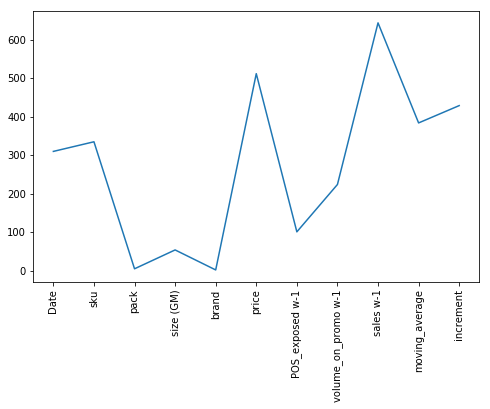

In [187]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.plot(train_.drop(['scope', 'target'], axis=1).columns, lgb.feature_importances_)